In [1]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from collections import Counter
from nltk.tokenize import word_tokenize

In [4]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [01:03, 3159.36it/s]


In [59]:
responses

[{'city': 'г. Москва',
  'rating_not_checked': False,
  'title': 'Жалоба',
  'num_comments': 0,
  'bank_license': 'лицензия № 2562',
  'author': 'uhnov1',
  'bank_name': 'Бинбанк',
  'datetime': '2015-06-08 12:50:54',
  'text': 'Добрый день! Я не являюсь клиентом банка и поручителем по кредитному договору, а также не являюсь каким-либо другим лицом, письменно  оформившим отношения с банком по поводу урегулирования чьей-либо  задолженности.  Начиная с марта 2015 года начали приходить бесконечные письма из ООО "Примо коллект"на мой адрес: город Москва, Уваровский переулок, дом 10, квартира 111, с угрозами о возбуждении уголовного дела в отношении гражданина Филиппова Эдуарда Владимировича, который уклоняется от уплаты взятых им кредитов: договор № 81014 от 20.10.2013 года и договор № 2464946 от 09.10.2014 года. Со всей ответственностью\xa0 хочу Вас заверить, что вышеуказанный гражданин, которого Вы разыскиваете, мне не знаком и никогда в моем адресе не был зарегистрирован. Каким образом 

In [5]:
#responses - список из словарей, каждый словарь - отдельный отзыв и информация по нему
responses[0]

{'city': 'г. Москва',
 'rating_not_checked': False,
 'title': 'Жалоба',
 'num_comments': 0,
 'bank_license': 'лицензия № 2562',
 'author': 'uhnov1',
 'bank_name': 'Бинбанк',
 'datetime': '2015-06-08 12:50:54',
 'text': 'Добрый день! Я не являюсь клиентом банка и поручителем по кредитному договору, а также не являюсь каким-либо другим лицом, письменно  оформившим отношения с банком по поводу урегулирования чьей-либо  задолженности.  Начиная с марта 2015 года начали приходить бесконечные письма из ООО "Примо коллект"на мой адрес: город Москва, Уваровский переулок, дом 10, квартира 111, с угрозами о возбуждении уголовного дела в отношении гражданина Филиппова Эдуарда Владимировича, который уклоняется от уплаты взятых им кредитов: договор № 81014 от 20.10.2013 года и договор № 2464946 от 09.10.2014 года. Со всей ответственностью\xa0 хочу Вас заверить, что вышеуказанный гражданин, которого Вы разыскиваете, мне не знаком и никогда в моем адресе не был зарегистрирован. Каким образом Вы не удо

In [6]:
responses[0]['city']

'г. Москва'

In [5]:
data = pd.DataFrame([response for response in responses])

In [60]:
data.head()

city  rating_not_checked  \
0       г. Москва               False   
1  г. Новосибирск               False   
2       г. Москва               False   
3   г. Ставрополь               False   
4    г. Челябинск               False   

                                               title  num_comments  \
0                                             Жалоба             0   
1      Не могу пользоваться услугой Сбербанк он-лайн             0   
2                    Двойное списание за один товар.             1   
3  Меняют проценты комиссии  не предупредив и не ...             2   
4             Верните денежные средства за страховку             1   

      bank_license       author        bank_name             datetime  \
0  лицензия № 2562       uhnov1          Бинбанк  2015-06-08 12:50:54   
1  лицензия № 1481       Foryou  Сбербанк России  2015-06-08 11:09:57   
2  лицензия № 2562   Vladimir84          Бинбанк  2015-06-05 20:14:28   
3  лицензия № 1481       643609  Сбербанк России  2015-06-05 13:51:01   
4  лицензия № 2766  anfisa-2003         ОТП Банк  2015-06-05 10:58:12   

                                                text  rating_grade  
0  Добрый день! Я не являюсь клиентом банка и пор...           NaN  
1  Доброго дня! Являюсь держателем зарплатной кар...           NaN  
2  Здравствуйте!  Дублирую свое заявление от 03.0...           NaN  
3  Добрый день!! Я открыл расчетный счет в СберБа...           NaN  
4  04.03.2015 г. взяла кредит в вашем банке, заяв...           NaN

# Количество отзывов по городам и по банкам

In [5]:
# Количество отзывов по городам
# всего: 5823 города

city_review_counts = data['city'].value_counts()
city_review_counts

г. Москва                               55354
г. Санкт-Петербург                      14342
г. Екатеринбург                          2337
г. Новосибирск                           2300
г. Нижний Новгород                       1976
                                        ...  
г. г.Калуга                                 1
г. ВЕЛИКИЕ ЛУКИ                             1
г. всеволожск                               1
г. сейчас                                   1
г. Краснодарский край, ст.Павловская        1
Name: city, Length: 5823, dtype: int64

In [6]:
# Количество отзывов по банкам
# всего: 670 банков

banks_review_counts = data['bank_name'].value_counts()
banks_review_counts

Сбербанк России     26327
Альфа-Банк          10224
ВТБ 24               8185
Русский Стандарт     7943
Хоум Кредит Банк     7549
                    ...  
Сиббизнесбанк           1
Донбанк                 1
Потенциал               1
Ури Банк                1
БайкалИнвестБанк        1
Name: bank_name, Length: 670, dtype: int64

In [ ]:
!pip install nltk

# Гистограммы длин слов

In [6]:
# tokenization, removal of punctuation
nltk.download('punkt')
from string import punctuation
punctuation
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tukma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
# Function to tokenize text and return word lengths
def lengths_of_tokens(text):
    tokens = word_tokenize(text)
    return [len(token) for token in tokens if token not in punctuation]

In [36]:
lengths = data['text'].apply(lengths_of_tokens)

In [37]:
lengths

0         [6, 4, 1, 2, 7, 8, 5, 1, 11, 2, 10, 8, 1, 5, 2...
1         [7, 3, 7, 10, 10, 5, 8, 10, 6, 1, 4, 4, 7, 7, ...
2         [12, 8, 4, 9, 2, 10, 1, 2, 2, 9, 2, 10, 4, 2, ...
3         [6, 4, 1, 6, 9, 4, 1, 9, 3, 2, 4, 2, 3, 4, 2, ...
4         [10, 2, 5, 6, 1, 5, 5, 10, 4, 5, 4, 3, 2, 6, 1...
                                ...                        
153494    [7, 7, 4, 2, 6, 9, 4, 9, 2, 7, 9, 5, 5, 7, 3, ...
153495    [2, 4, 8, 1, 5, 9, 5, 14, 9, 3, 7, 4, 1, 9, 2,...
153496    [9, 11, 5, 1, 3, 1, 1, 8, 1, 9, 3, 7, 6, 6, 5,...
153497    [9, 8, 8, 5, 1, 6, 1, 11, 12, 5, 2, 11, 2, 7, ...
153498    [4, 7, 2, 3, 8, 6, 8, 5, 4, 6, 2, 9, 1, 3, 6, ...
Name: text, Length: 153499, dtype: object

In [38]:
from collections import defaultdict


word_length_counts = defaultdict(int)

for length in lengths:
    for i in length:
        word_length_counts[i] += 1 

word_length_counts = dict(word_length_counts)
word_length_counts

{6: 3826528,
 4: 2991517,
 1: 4522890,
 2: 4393252,
 7: 3171119,
 8: 2775447,
 5: 4397835,
 11: 952229,
 10: 1566243,
 9: 2419110,
 14: 218583,
 13: 398765,
 3: 4286449,
 16: 61755,
 12: 585677,
 15: 122394,
 17: 24536,
 19: 8852,
 22: 2407,
 20: 5637,
 26: 472,
 81: 14,
 18: 21387,
 21: 2709,
 23: 1464,
 33: 143,
 60: 36,
 56: 402,
 70: 42,
 30: 322,
 45: 79,
 41: 97,
 24: 1925,
 25: 712,
 27: 330,
 136: 1,
 48: 245,
 43: 101,
 42: 365,
 38: 111,
 35: 126,
 129: 1,
 63: 40,
 75: 22,
 62: 37,
 52: 57,
 73: 9,
 59: 33,
 111: 1,
 47: 181,
 46: 127,
 58: 35,
 32: 236,
 99: 6,
 97: 2,
 102: 3,
 110: 2,
 28: 249,
 29: 251,
 49: 88,
 51: 73,
 37: 102,
 31: 174,
 36: 104,
 39: 977,
 67: 32,
 61: 41,
 55: 74,
 74: 8,
 118: 1,
 34: 120,
 53: 65,
 91: 3,
 54: 59,
 89: 10,
 76: 13,
 85: 3,
 90: 13,
 44: 81,
 72: 11,
 40: 112,
 65: 33,
 57: 49,
 69: 30,
 71: 37,
 50: 79,
 77: 8,
 83: 13,
 79: 14,
 80: 16,
 64: 31,
 92: 5,
 94: 14,
 93: 4,
 105: 4,
 86: 2,
 82: 10,
 95: 3,
 107: 6,
 68: 15,
 66: 31

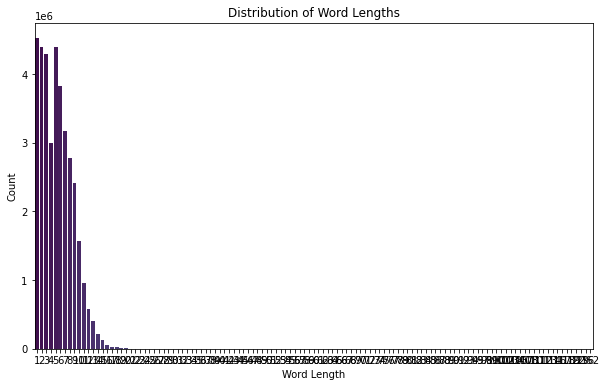

In [39]:
word_length_df = pd.DataFrame(list(word_length_counts.items()), columns=['word_length', 'count'])

# Create a distribution plot 
plt.figure(figsize=(10, 6))
sns.barplot(x='word_length', y='count', data=word_length_df, palette='viridis')
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.title('Distribution of Word Lengths')
plt.show()

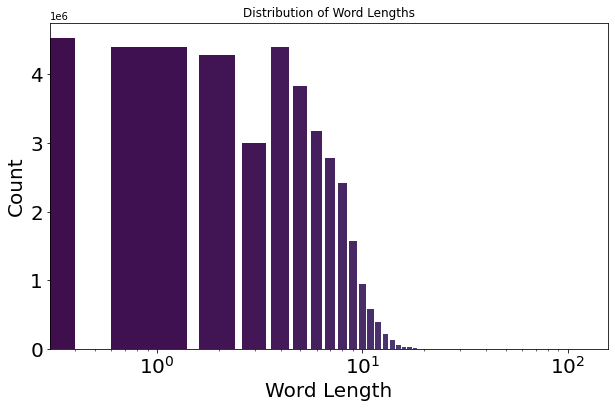

In [46]:
# log scale for more informative visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='word_length', y='count', data=word_length_df, palette='viridis')
plt.xlabel('Word Length', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of Word Lengths')
plt.show()


около 5 млн слов длиной в 1 символ были знаками препинания, осталось примерно 4,5 млн слов в 1 символ.

In [43]:
sorted(word_length_counts.items())

[(1, 4522890),
 (2, 4393252),
 (3, 4286449),
 (4, 2991517),
 (5, 4397835),
 (6, 3826528),
 (7, 3171119),
 (8, 2775447),
 (9, 2419110),
 (10, 1566243),
 (11, 952229),
 (12, 585677),
 (13, 398765),
 (14, 218583),
 (15, 122394),
 (16, 61755),
 (17, 24536),
 (18, 21387),
 (19, 8852),
 (20, 5637),
 (21, 2709),
 (22, 2407),
 (23, 1464),
 (24, 1925),
 (25, 712),
 (26, 472),
 (27, 330),
 (28, 249),
 (29, 251),
 (30, 322),
 (31, 174),
 (32, 236),
 (33, 143),
 (34, 120),
 (35, 126),
 (36, 104),
 (37, 102),
 (38, 111),
 (39, 977),
 (40, 112),
 (41, 97),
 (42, 365),
 (43, 101),
 (44, 81),
 (45, 79),
 (46, 127),
 (47, 181),
 (48, 245),
 (49, 88),
 (50, 79),
 (51, 73),
 (52, 57),
 (53, 65),
 (54, 59),
 (55, 74),
 (56, 402),
 (57, 49),
 (58, 35),
 (59, 33),
 (60, 36),
 (61, 41),
 (62, 37),
 (63, 40),
 (64, 31),
 (65, 33),
 (66, 31),
 (67, 32),
 (68, 15),
 (69, 30),
 (70, 42),
 (71, 37),
 (72, 11),
 (73, 9),
 (74, 8),
 (75, 22),
 (76, 13),
 (77, 8),
 (78, 8),
 (79, 14),
 (80, 16),
 (81, 14),
 (82, 10)

# самые частотные слова

In [47]:
# create corpus with all words

corpus = [token for review in data.text 
          for token in word_tokenize(review) 
          if token not in punctuation]


10 most frequent words INcluding stop-words


In [49]:
freq_dict = Counter(corpus)
freq_dict.most_common(10)

[('в', 1169557),
 ('и', 980761),
 ('не', 816419),
 ('на', 638715),
 ('что', 603171),
 ('я', 443478),
 ('с', 428021),
 ('по', 338743),
 ('мне', 293980),
 ('банка', 235176)]

In [7]:
# extending punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
rus_stopwords = set(stopwords.words('russian'))
                              
custom_stop_words = {'...', 'это', "''", '``', '«', '»'}

# Extend the existing stopwords list with custom words
extended_stop_words = rus_stopwords.union(custom_stop_words)

digit_pattern = re.compile(r'\d')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tukma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
filtered_corpus = [token.lower() for review in data['text']
                   for token in word_tokenize(review)
                   if token.lower() not in punctuation and token.lower() not in extended_stop_words
                   and not digit_pattern.search(token)]

10 most frequent words EXcluding stop-words


In [58]:
freq_dict = Counter(filtered_corpus)
freq_dict.most_common(10)

[('банка', 263958),
 ('банк', 196303),
 ('деньги', 130062),
 ('карту', 104947),
 ('карты', 100877),
 ('кредит', 80282),
 ('день', 75996),
 ('заявление', 69524),
 ('отделение', 66468),
 ('очень', 66174)]

# закон Ципфа и Хипса

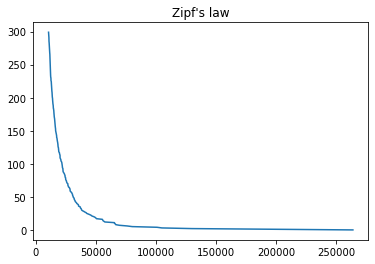

In [113]:
freqs = list(freq_dict.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.title('Zipf\'s law')
plt.show()

In [43]:
temp_corpus = set()
n_words_in_corpus = []
n_tokens = []
num_tokens = 0
for index, row in tqdm(data.iterrows(), total = len(data)):
    
    tokens = [token.lower() for token in word_tokenize(row['text']) 
              if token not in punctuation
              and not digit_pattern.search(token)]    
    
    num_tokens += len(tokens)
    n_tokens.append(num_tokens)
    
    new_tokens = [token for token in tokens 
                       if token not in temp_corpus]
    temp_corpus.update(new_tokens)
    n_words_in_corpus.append(len(temp_corpus))



100%|██████████| 153499/153499 [06:19<00:00, 404.16it/s]


In [44]:
n_tokens[:10]

[215, 349, 434, 556, 845, 927, 1012, 1112, 1206, 1396]

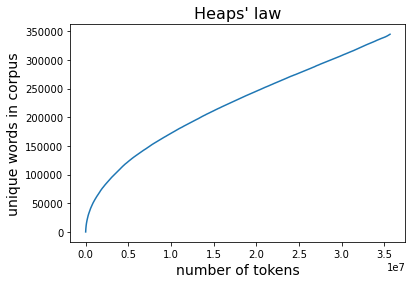

In [91]:
fig, ax = plt.subplots()
ax.plot(n_tokens, n_words_in_corpus)
plt.title('Heaps\' law', fontsize=16)
ax.set_ylabel('unique words in corpus', fontsize=14)
ax.set_xlabel('number of tokens', fontsize=14)

plt.show()

## Лемматизация

In [23]:
!pip install pymystem3

In [8]:
from pymystem3 import Mystem

In [9]:
rus_stopwords.update([' ', '\n', '«', '»', 'это', "''", '``', '...', 
                      '\xa0', ' \xa0', '\xa0 ', ' \xa0- ', '. \xa0 ', 
                      '№', '  ',
                     'г', 'год', 'т', 'р', 'руб'])

In [18]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
# extend punctuation
additional_punctuation = [char + ' ' for char in punctuation]
additional_punctuation
additional_punctuation_string = ''.join(additional_punctuation)
punctuation = punctuation + additional_punctuation_string
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~! " # $ % & \' ( ) * + , - . / : ; < = > ? @ [ \\ ] ^ _ ` { | } ~ '

check lemmatization on a small part of dataset

In [11]:
data_10 = data.iloc[:10, :].copy()

In [75]:
mystem_analyzer = Mystem()
# function for text tokenization and cleaning
def lemmatize_and_clean(text):
    # Tokenize the text
    tokens = mystem_analyzer.lemmatize(text)
    # Convert to lower case
    tokens = [word.lower() for word in tokens]
    # Remove punctuation
    tokens = [word for word in tokens if word not in punctuation]
    # Remove stop words and digits
    tokens = [word for word in tokens if word not in rus_stopwords
             and not digit_pattern.search(word)]
    return tokens
        

In [63]:
data_10['text_lemmatized'] = data_10['text'].apply(lemmatize_and_clean)
data_10.head(3)

city  rating_not_checked  \
0       г. Москва               False   
1  г. Новосибирск               False   
2       г. Москва               False   

                                           title  num_comments  \
0                                         Жалоба             0   
1  Не могу пользоваться услугой Сбербанк он-лайн             0   
2                Двойное списание за один товар.             1   

      bank_license      author        bank_name             datetime  \
0  лицензия № 2562      uhnov1          Бинбанк  2015-06-08 12:50:54   
1  лицензия № 1481      Foryou  Сбербанк России  2015-06-08 11:09:57   
2  лицензия № 2562  Vladimir84          Бинбанк  2015-06-05 20:14:28   

                                                text  rating_grade  \
0  Добрый день! Я не являюсь клиентом банка и пор...           NaN   
1  Доброго дня! Являюсь держателем зарплатной кар...           NaN   
2  Здравствуйте!  Дублирую свое заявление от 03.0...           NaN   

                                     text_lemmatized  
0  [добрый, день, являться, клиент, банк, поручит...  
1  [добрый, день, являться, держатель, зарплатной...  
2  [здравствовать, !  , дублировать, свой, заявле...

In [69]:
# example of lemmatized text
print(data_10.at[9, 'text_lemmatized'])

['добрый', 'день', 'являться', 'заемщик', 'банк', 'втб', 'год', 'назад', 'взять', 'кредит', 'млн', 'руб', 'платить', 'исправно', 'май', 'месяц', 'год', 'связь', 'ухудшение', 'материальный', 'положение', 'поменять', 'работа', 'заработный', 'плата', 'составлять', 'руб', 'ежемесячный', 'платеж', 'кредит', 'руб', 'ухудшение', 'материальный', 'положение', 'уведомлять', 'банк', 'месяц', 'письмо', 'отметка', 'банк', 'получение', 'отказываться', 'платить', 'шанс', 'близкий', 'год', 'материальный', 'положение', 'значительно', 'улучшаться', 'возможность', 'гасить', 'кредит', 'полный', 'мера', 'данный', 'момент', 'ситуация', 'обращаться', 'банк', 'помощь', 'предлагать', 'просрочивать', 'платеж', 'заранее', 'появление', 'просрочка', 'банк', 'рассматривать', 'возможность', 'реструктуризация', 'давно', 'изменяться', 'контакт', 'уведомлять', 'банк', 'скрываться', 'собираться', 'платить', 'отказываться', 'ситуация', 'патовый', 'платить', 'нечего', 'банк', 'пока', 'идти', 'встреча', 'просить', 'помогат

In [72]:
# try on the whole dataset
data['text_lemmatized'] = data['text'].apply(lemmatize_and_clean)

KeyboardInterrupt: 

It takes too long to finish lemmatization on the whole dataset, 
Lemmatization will be done on the 10K samples randomly selected from data

In [73]:
data_10K = data.sample(n=10000)

In [76]:
data_10K['text_lemmatized'] = data_10K['text'].apply(lemmatize_and_clean)

In [78]:
# save 10K samples data with new column containing lemmatized text
data_10K.to_csv('dataset_10K.csv', index=False)

In [80]:
data_10K = pd.read_csv('dataset_10K.csv')
data_10K.head(3)

city  rating_not_checked  \
0   г. Химки               False   
1  г. Москва               False   
2        NaN               False   

                                            title  num_comments  \
0  Очередная придирка новичков МосОблБанка, Химки             3   
1                 Неадекватная организация работы             1   
2                           Нелепая задолженность            11   

      bank_license     author                  bank_name             datetime  \
0  лицензия № 1751     sergor  Московский Областной Банк  2012-09-28 15:48:00   
1  лицензия № 3267  Maxim_001                  МАСТ-Банк  2015-01-13 10:47:00   
2  лицензия № 3354    Ириша06           Ренессанс Кредит  2007-06-04 10:44:00   

                                                text  rating_grade  \
0  Уже третий год заканчивается, как моя теща отк...           4.0   
1  Вчера, 12.01.2015, в дополнительном офисе «Яки...           1.0   
2  Взяла кредит в IKEI 5 ноября 2007 г. Первые тр...           1.0   

                                     text_lemmatized  
0  ['третий', 'заканчиваться', 'теща', 'открывать...  
1  ['вчера', 'дополнительный', 'офис', ' «', 'яки...  
2  ['взять', 'кредит', 'ikei', 'ноябрь', 'первый'...

In [75]:
# example of lemmatized text
print(data_10K.at[5, 'text_lemmatized'])

['сказать', 'честно', 'большой', 'опыт', 'использование', 'платежный', 'кредитный', 'карта', 'карточка', 'ситибанк', 'пользоваться', 'зарплатный', 'поэтому', 'обслуживание', 'плакать', 'карта', 'делать', 'долго', 'минус', 'резерв', 'средство', 'поэтому', 'очень', 'пострадать', 'снимать', 'зарплата', 'поздно', 'понравиться', 'идея', 'пин', 'код', 'назначать', 'клиент', 'обычно', 'присылаться', 'конвертик', 'который', 'отслеживать', 'как-нибудь', 'поэтому', 'риск', 'мошенничество', 'несколько', 'снижаться', 'ездить', 'муж', 'тайланд', 'карточка', 'сбербанк', 'действовать', 'заранее', 'написать', 'заявление', 'совершать', 'транзакция', 'регион', 'карточка', 'сити', 'пользоваться', 'проблема', 'долгий', 'ожидание', 'ситифон', 'напрягать', 'заранее', 'предубеждение', 'против', 'род', 'операция', 'вспомнить', 'долго', 'стоять', 'очередь', 'сбера', 'оплачивать', 'коммунальный', 'услуга', 'поэтому', 'тратить', 'свой', 'нерв', 'отрицательный', 'эмоция', 'вызывать', 'недалекий', 'операционист', 

# 10 самых частотных лемм

In [12]:
import ast
lemmas_lists = data_10K['text_lemmatized']
data_10K['text_lemmatized'] = data_10K['text_lemmatized'].apply(ast.literal_eval)
lemmas_lists[:8]

0    [третий, заканчиваться, теща, открывать, пенси...
1    [вчера, дополнительный, офис,  «, якиманка, » ...
2    [взять, кредит, ikei, ноябрь, первый, платеж, ...
3    [вчера, снятие, наличные, отделение, банк, про...
4    [добрый, день, сегодня, примерно, час, зайти, ...
5    [сказать, честно, большой, опыт, использование...
6    [являться, клиент, банк, пока, сокращать, рабо...
7    [писать, подробно, : (, весь, операция, осущес...
Name: text_lemmatized, dtype: object

In [13]:
lemmas_corpus = [lemma for sublist in lemmas_lists
                 for lemma in sublist]

In [14]:
# 10 most feequent lemmas
freq_lemmas = Counter(lemmas_corpus)
freq_lemmas.most_common(20)

[('банк', 39793),
 ('карта', 22032),
 ('деньги', 11717),
 ('день', 11283),
 ('кредит', 10334),
 ('который', 9770),
 ('счет', 9194),
 ('весь', 9149),
 ('отделение', 9121),
 ('клиент', 9008),
 ('сотрудник', 8816),
 ('.  ', 8699),
 ('мочь', 7978),
 ('свой', 7640),
 ('сказать', 7485),
 ('сумма', 7213),
 ('получать', 7040),
 ('заявление', 6797),
 ('вопрос', 6422),
 ('время', 6299)]

# какое слово встречается чаще, "сотрудник" или "клиент"?
Клиент встречается чаще, чем сотрудникю клиент стоит на 10 позиции вчастотности, сотрудник на 11.
# сколько раз встречается слова "мошенничество" и "доверие"?

In [54]:
def get_lemma_frequency(lemma):
    frequency = freq_lemmas.get(lemma, 0)
    print("частота слова \"" + str(lemma) + "\" : " + str(frequency))
    

In [55]:
get_lemma_frequency('мошенничество')

частота слова "мошенничество" : 231


In [56]:
get_lemma_frequency('доверие')

частота слова "доверие" : 157


# 10 самых частых существительных

In [18]:
!pip install pymorphy2

In [24]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

def get_nouns(text):
    tokens = text.split()
    nouns = [token for token in tokens if morph.parse(token)[0].tag.POS == 'NOUN']
    return nouns

all_nouns = [noun for text in data_10K['text'] for noun in get_nouns(text)]
noun_counts = Counter(all_nouns)
most_common_nouns = noun_counts.most_common(10)
print("10 самых частотных существительных:")
for noun, count in most_common_nouns:
    print(f"{noun}: {count}")

10 самых частотных существительных:
банка: 9287
банк: 7125
деньги: 5855
карты: 4147
карту: 4044
раз: 3944
заявление: 3252
время: 3181
кредит: 3095
отделение: 3009


In [25]:
# есть словоформы банк-банка и карты-карту, поэтому выведу 12 слов.
# лучше это сделать с лемматизацией внутри функции, но это займет слишком много времени.

most_common_nouns = noun_counts.most_common(12)
print("10 самых частотных существительных:")
for noun, count in most_common_nouns:
    print(f"{noun}: {count}")

10 самых частотных существительных:
банка: 9287
банк: 7125
деньги: 5855
карты: 4147
карту: 4044
раз: 3944
заявление: 3252
время: 3181
кредит: 3095
отделение: 3009
день: 2675
года: 2429


# tf-idf

In [13]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

data = data.dropna()
data = data[(data.rating_grade == 1) | (data.rating_grade == 5)]
X_train, X_test, y_train, y_test = train_test_split(data.text, data.rating_grade)

vec = TfidfVectorizer()
bow = vec.fit_transform(X_train)
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(X_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98     10332
         5.0       0.87      0.98      0.92      2260

    accuracy                           0.97     12592
   macro avg       0.93      0.97      0.95     12592
weighted avg       0.97      0.97      0.97     12592



In [92]:
# Get feature names
feature_names = vec.get_feature_names_out()

# Get coefficients for each class
coefficients = clf.coef_

In [117]:
def get_top_keywords_rating_1(coefficients, feature_names, top_n=10):
    top_keywords = {}
    for i, coef in enumerate(coefficients):
        # Get top features for the class
        top_indices = np.argsort(coef)[:top_n]
        top_keywords = [feature_names[index] for index in top_indices]
    return top_keywords

# Get top keywords for each class (1 and 5)
top_keywords = get_top_keywords_rating_1(coefficients, feature_names, top_n=10)

print('Key words for rating 1')
top_keywords

Key words for rating 1


['не',
 'почему',
 'нет',
 'ответ',
 'вы',
 'никто',
 'зачем',
 'ничего',
 'что',
 'должен']

In [118]:
def get_top_keywords_rating_5(coefficients, feature_names, top_n=10):
    top_keywords = {}
    for i, coef in enumerate(coefficients):
        # Get top features for the class
        top_indices = np.argsort(coef)[::-1][:top_n]
        top_keywords = [feature_names[index] for index in top_indices]
    return top_keywords

# Get top keywords for each class (1 and 5)
top_keywords = get_top_keywords_rating_5(coefficients, feature_names, top_n=10)

print('Key words for rating 5')
top_keywords

Key words for rating 5


['спасибо',
 'приятно',
 'быстро',
 'благодарность',
 'очень',
 'поблагодарить',
 'всегда',
 'все',
 'доволен',
 'ткс']

# Vectorizer based on bigramms

In [115]:
vec_2 = CountVectorizer(ngram_range=(1, 2))
bow_2 = vec_2.fit_transform(X_train)

clf.fit(bow_2, y_train)
pred_2 = clf.predict(vec_2.transform(X_test))
print(classification_report(pred_2, y_test))

              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98     10187
         5.0       0.91      0.97      0.94      2405

    accuracy                           0.98     12592
   macro avg       0.95      0.97      0.96     12592
weighted avg       0.98      0.98      0.98     12592



In [120]:
# Get feature names
feature_names_2 = vec_2.get_feature_names_out()

# Get coefficients for each class
coefficients_2 = clf.coef_

In [121]:
bad_keywords_2 = get_top_keywords_rating_1(coefficients_2, feature_names_2, top_n=10)

print('Key words for rating 1')
bad_keywords_2

Key words for rating 1


['зачем',
 'ладно',
 'невозможно',
 'так не',
 'видимо',
 'должен',
 'завтра',
 'якобы',
 'говорят',
 'жалобу']

In [122]:
good_keywords_2 = get_top_keywords_rating_5(coefficients_2, feature_names_2, top_n=10)

print('Key words for rating 5')
good_keywords_2

Key words for rating 5


['спасибо',
 'приятно',
 'благодарность',
 'быстро',
 'поблагодарить',
 'доволен',
 'оперативность',
 'оперативно',
 'очередей',
 'молодцы']

## Topic Modelling

In [14]:
#from pymystem3 import Mystem
import pymorphy2
m = pymorphy2.MorphAnalyzer()

In [15]:
mystopwords = stopwords.words('russian') + [
    'это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д',
    'который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой', 'это'
]
ru_words = re.compile("[А-Яа-я]+")


def words_only(text):
    return " ".join(ru_words.findall(text))

def lemmatize(text, mystem=m):
    try:
        return " ".join([m.parse(w)[0].normal_form for w in text.split(' ')]).strip()  
    except:
        return " "

def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

    
def preprocess(text):
    return remove_stopwords(lemmatize(words_only(text.lower())))

In [18]:
%%time
data_10K.text = tqdm(data_10K.text.apply(preprocess))


100%|██████████| 10000/10000 [00:00<00:00, 1653774.94it/s]

Wall time: 12min 20s


In [ ]:
data.head()

In [19]:
# !pip install gensim
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import similarities

In [20]:
texts = [text.split() for text in data_10K.text]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [21]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [24]:
index = similarities.MatrixSimilarity(corpus_tfidf)
sims = index[corpus_tfidf]

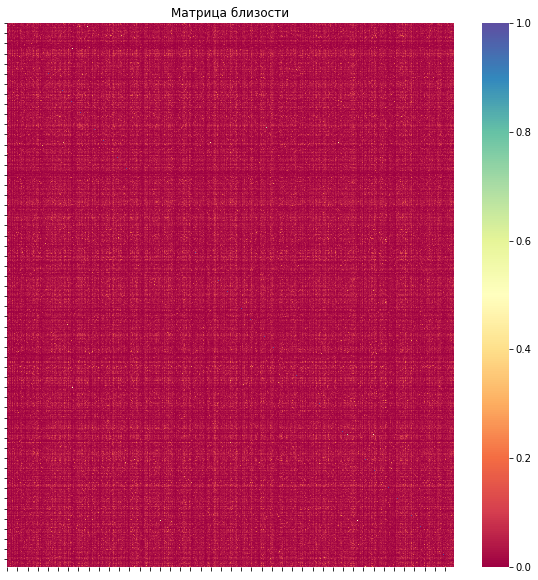

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])
plt.title("Матрица близости")
plt.show()

матрица ничего не визуализирует

In [27]:
from gensim.models import lsimodel

In [32]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5)

Wall time: 4.67 s


In [119]:
for topic_num, topic in enumerate(lsi.show_topics(num_topics=5, num_words=15)):
    print(f"Topic {topic_num}:")
    print(topic)

Topic 0:
(0, '0.198*"карта" + 0.136*"кредит" + 0.117*"деньга" + 0.112*"заявление" + 0.106*"счёт" + 0.103*"банкомат" + 0.100*"отделение" + 0.099*"вклад" + 0.098*"сбербанк" + 0.096*"сумма" + 0.091*"кредитный" + 0.089*"сотрудник" + 0.089*"платёж" + 0.088*"день" + 0.084*"номер"')
Topic 1:
(1, '0.384*"кредит" + -0.293*"банкомат" + -0.242*"карта" + 0.195*"страховка" + -0.161*"деньга" + -0.153*"вклад" + -0.149*"сбербанк" + 0.145*"договор" + -0.142*"операция" + 0.126*"задолженность" + 0.120*"погашение" + 0.105*"платёж" + 0.105*"страхование" + 0.104*"звонок" + -0.102*"счёт"')
Topic 2:
(2, '-0.596*"вклад" + 0.166*"банкомат" + -0.144*"очередь" + -0.139*"открыть" + 0.134*"сбербанк" + 0.131*"заявление" + 0.122*"карта" + 0.104*"номер" + 0.104*"платёж" + -0.100*"ставка" + 0.097*"задолженность" + -0.096*"офис" + -0.093*"открытие" + 0.090*"смс" + 0.087*"претензия"')
Topic 3:
(3, '0.274*"вклад" + 0.206*"сумма" + -0.194*"номер" + 0.166*"договор" + 0.163*"руб" + -0.160*"заявка" + -0.157*"карта" + -0.152*"

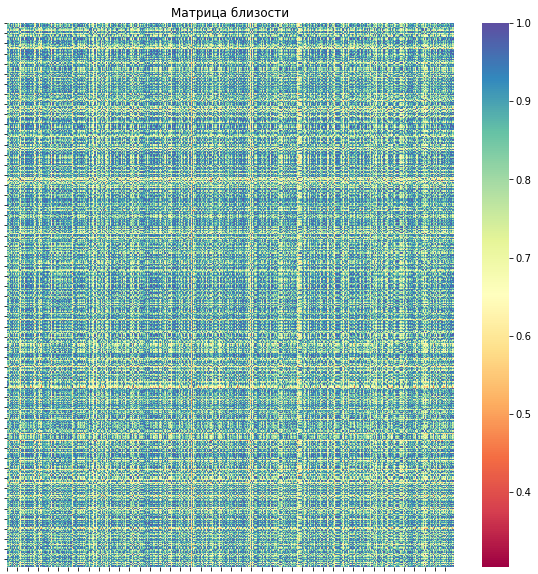

In [34]:
corpus_lsi = lsi[corpus]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[corpus_lsi]
sims  = (sims + 1)/2.
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

In [40]:
%%time
lsi2 = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=10)

Wall time: 4.73 s


In [41]:
lsi2.show_topics()

[(0,
  '0.198*"карта" + 0.136*"кредит" + 0.117*"деньга" + 0.112*"заявление" + 0.106*"счёт" + 0.103*"банкомат" + 0.100*"отделение" + 0.099*"вклад" + 0.098*"сбербанк" + 0.096*"сумма"'),
 (1,
  '-0.384*"кредит" + 0.294*"банкомат" + 0.242*"карта" + -0.193*"страховка" + 0.161*"деньга" + 0.152*"вклад" + 0.149*"сбербанк" + -0.145*"договор" + 0.142*"операция" + -0.126*"задолженность"'),
 (2,
  '-0.596*"вклад" + 0.166*"банкомат" + -0.146*"очередь" + -0.139*"открыть" + 0.134*"сбербанк" + 0.131*"заявление" + 0.122*"карта" + 0.104*"платёж" + 0.103*"номер" + -0.100*"ставка"'),
 (3,
  '0.275*"вклад" + 0.208*"сумма" + -0.196*"номер" + 0.167*"договор" + 0.162*"руб" + -0.160*"заявка" + -0.158*"карта" + 0.152*"платёж" + -0.151*"звонок" + 0.150*"банкомат"'),
 (4,
  '-0.346*"вклад" + -0.265*"номер" + 0.193*"страховка" + -0.186*"звонок" + 0.172*"банкомат" + 0.165*"заявка" + 0.162*"карта" + 0.159*"кредит" + -0.140*"телефон" + -0.137*"ваш"'),
 (5,
  '0.413*"карта" + -0.403*"банкомат" + 0.194*"кредитный" + 0.

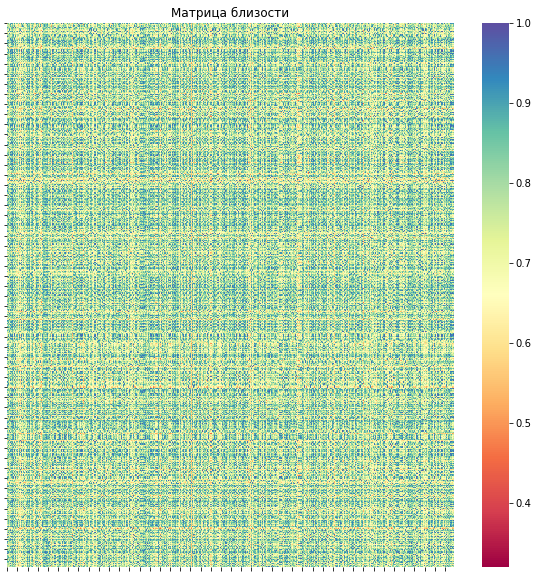

In [43]:
corpus_lsi2 = lsi2[corpus]
index2 = similarities.MatrixSimilarity(lsi2[corpus])
sims2 = index2[corpus_lsi2]
sims2  = (sims2 + 1)/2.
plt.figure(figsize = (10,10))
sns.heatmap(data=sims2, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

In [ ]:
модель с 5 темами выглядит лучше, чем с 10 (?). Выше похожесть векторов и больше размах.

In [63]:
lsi3 = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=25)

In [64]:
for topic_num, topic in enumerate(lsi3.show_topics(num_topics=25, num_words=20)):
    print(f"Topic {topic_num}:")
    print(topic)

Topic 0:
(0, '0.198*"карта" + 0.136*"кредит" + 0.117*"деньга" + 0.112*"заявление" + 0.106*"счёт" + 0.103*"банкомат" + 0.100*"отделение" + 0.099*"вклад" + 0.098*"сбербанк" + 0.096*"сумма" + 0.091*"кредитный" + 0.089*"сотрудник" + 0.089*"платёж" + 0.088*"день" + 0.084*"номер" + 0.083*"всё" + 0.082*"сказать" + 0.081*"договор" + 0.080*"год" + 0.076*"ваш"')
Topic 1:
(1, '0.384*"кредит" + -0.293*"банкомат" + -0.242*"карта" + 0.194*"страховка" + -0.162*"деньга" + -0.153*"вклад" + -0.149*"сбербанк" + 0.145*"договор" + -0.141*"операция" + 0.126*"задолженность" + 0.122*"погашение" + 0.105*"страхование" + 0.104*"платёж" + 0.104*"звонок" + -0.101*"счёт" + -0.100*"средство" + 0.098*"заявка" + 0.096*"кредитный" + 0.095*"погасить" + 0.095*"справка"')
Topic 2:
(2, '-0.596*"вклад" + 0.166*"банкомат" + -0.145*"очередь" + -0.139*"открыть" + 0.134*"сбербанк" + 0.131*"заявление" + 0.121*"карта" + 0.103*"номер" + 0.103*"платёж" + -0.099*"ставка" + 0.097*"задолженность" + -0.094*"офис" + -0.093*"открытие" + 

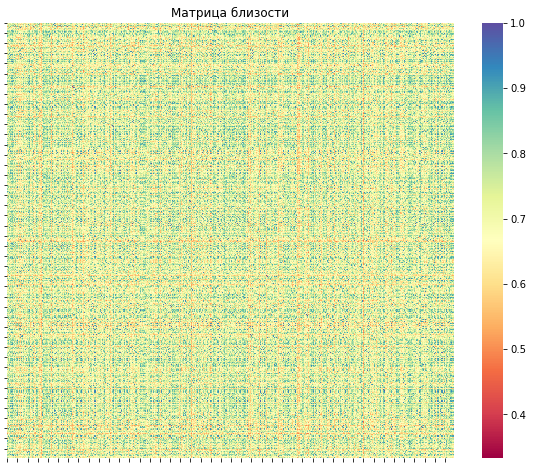

In [65]:
corpus_lsi3 = lsi3[corpus]
index3 = similarities.MatrixSimilarity(lsi3[corpus])
sims3 = index3[corpus_lsi3]
sims3  = (sims3 + 1)/2.
plt.figure(figsize = (10,8))
sns.heatmap(data=sims3, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

чем больше делаю тем, тем хуже выглядит матрица близости.
оставлю 5 тем.

По ключевым словам можно найти название банка. Но кроме сбербанка ничего почти не попадалось.

Есть интерптертируемые темы. Например:

Topic 14:

(14, '0.301*"курс" + 0.277*"руб" + 0.201*"доллар" + -0.192*"счёт" + 0.188*"рубль" + -0.181*"перевод" + 0.173*"кассир" + 0.170*"касса" + 0.160*"терминал" + 0.155*"валюта" + -0.139*"альфа" + 0.116*"сумма" + 0.115*"справка" + -0.115*"платёж" + 0.112*"очередь" + 0.108*"евро" + -0.103*"проблема" + -0.100*"страховка" + 0.098*"лимит" + 0.094*"заявка"')
речь идет о валютных операциях

Topic 13:

(13, '0.215*"кошелёк" + 0.189*"сбербанк" + -0.161*"платёж" + 0.155*"справка" + 0.152*"квартира" + 0.149*"документ" + 0.144*"деньга" + -0.141*"очередь" + -0.134*"центр" + -0.133*"услуга" + 0.124*"киви" + -0.119*"оператор" + -0.119*"погашение" + -0.115*"колл" + -0.114*"смс" + 0.110*"заблокировать" + -0.108*"заявка" + 0.108*"кредит" + 0.104*"ипотека" + -0.104*"досрочный"')
здесь речь может идти о погашении ипотечного кредита, оплате кредита сбербанка через киви-кошелек


Но по большей мере темы трудно интерпретировать, они повторяют друг друга и используют самые частотные слова вроде "банкомат", "карта", "счет", которые ничего не говорят о конкретной проблеме. 

# Классификация текстов

Логистическая регрессия на n-граммах

In [66]:
# униграммы
vec_1_1 = CountVectorizer(ngram_range=(1, 1))
bow_1_1 = vec_1_1.fit_transform(X_train)

clf.fit(bow_1_1, y_train)
pred_1_1 = clf.predict(vec_1_1.transform(X_test))
print(classification_report(pred_1_1, y_test))

              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98     10132
         5.0       0.91      0.95      0.93      2460

    accuracy                           0.97     12592
   macro avg       0.95      0.96      0.96     12592
weighted avg       0.97      0.97      0.97     12592



In [67]:
# биграммы
vec_1_2 = CountVectorizer(ngram_range=(1, 2))
bow_1_2 = vec_1_2.fit_transform(X_train)

clf.fit(bow_1_2, y_train)
pred_1_2 = clf.predict(vec_1_2.transform(X_test))
print(classification_report(pred_1_2, y_test))

              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98     10169
         5.0       0.91      0.96      0.94      2423

    accuracy                           0.97     12592
   macro avg       0.95      0.97      0.96     12592
weighted avg       0.98      0.97      0.97     12592



In [68]:
# триграммы

vec_1_3 = CountVectorizer(ngram_range=(1, 3))
bow_1_3 = vec_1_3.fit_transform(X_train)

clf.fit(bow_1_3, y_train)
pred_1_3 = clf.predict(vec_1_3.transform(X_test))
print(classification_report(pred_1_3, y_test))

              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98     10197
         5.0       0.90      0.96      0.93      2395

    accuracy                           0.97     12592
   macro avg       0.95      0.97      0.96     12592
weighted avg       0.97      0.97      0.97     12592



модель с биграммами, используемыми в качестве признаков, имеет чуть более высокое качество.

Для создания модели со скрытыми темами в качестве признака возьмем выборку в 10К образцов, потому что для нее были найдены темы.

In [97]:
# Baseline on Model with 10K samples

data_10K_ = data_10K[(data_10K.rating_grade == 1) | (data_10K.rating_grade == 5)]
X_train_10K, X_test_10K, y_train_10K, y_test_10K = train_test_split(data_10K_.text, data_10K_.rating_grade)

vec_10K = TfidfVectorizer()
bow_10K = vec_10K.fit_transform(X_train_10K)

clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow_10K, y_train_10K)

bow_test_10K = vec_10K.transform(X_test_10K)  
pred_10K = clf.predict(bow_test_10K)
print(classification_report(pred_10K, y_test_10K))

              precision    recall  f1-score   support

         1.0       1.00      0.90      0.94       867
         5.0       0.63      0.99      0.77       156

    accuracy                           0.91      1023
   macro avg       0.82      0.94      0.86      1023
weighted avg       0.94      0.91      0.92      1023



In [107]:
# добавим скрытую тему в качестве признака. выберем 5 тем.
num_topics = 5

def get_dominant_topic(lsi_corpus, num_topics):
    dominant_topics = []
    for doc in lsi_corpus:
        # Сортируем темы по их весам в обратном порядке и берем тему с максимальным весом
        sorted_topics = sorted(doc, key=lambda x: x[1], reverse=True)
        dominant_topic = sorted_topics[0][0] if sorted_topics else -1
        dominant_topics.append(dominant_topic)
    return dominant_topics

# Добавляем номер основной темы в data_10K
data_10K['dominant_topic'] = get_dominant_topic(corpus_lsi, num_topics)
# Проверяем результат
print(data_10K.head())

                 city  rating_not_checked  \
0            г. Химки               False   
1           г. Москва               False   
2                 NaN               False   
3          г. Саратов               False   
4  г. Санкт-Петербург               False   

                                            title  num_comments  \
0  Очередная придирка новичков МосОблБанка, Химки             3   
1                 Неадекватная организация работы             1   
2                           Нелепая задолженность            11   
3                                Решение проблемы             0   
4                   Снятие денег вклад "Управляй"             3   

      bank_license      author                  bank_name  \
0  лицензия № 1751      sergor  Московский Областной Банк   
1  лицензия № 3267   Maxim_001                  МАСТ-Банк   
2  лицензия № 3354     Ириша06           Ренессанс Кредит   
3  лицензия № 1326   nadirabzi                 Альфа-Банк   
4  лицензия № 1481  F

In [110]:
data_10K_topic = data_10K[(data_10K.rating_grade == 1) | (data_10K.rating_grade == 5)]
X = data_10K_topic[['text', 'dominant_topic']]
y = data_10K_topic.rating_grade
X_train_10K_topic, X_test_10K_topic, y_train_10K_topic, y_test_10K_topic = train_test_split(X, y, random_state = 42)

In [116]:
# векторизация текста комментариев и объединение результата с индексом скрытой темы отдельно для train и test
from scipy.sparse import hstack, csr_matrix

vec = TfidfVectorizer()
bow_10K_text  = vec.fit_transform(X_train_10K_topic['text'])
dominant_topic_train = csr_matrix(X_train_10K_topic[['dominant_topic']].values)
X_train_combined = hstack((bow_10K_text, dominant_topic_train))

bow_test_10K_text = vec.transform(X_test_10K_topic['text'])
dominant_topic_test = csr_matrix(X_test_10K_topic[['dominant_topic']].values)
X_test_combined = hstack((bow_test_10K_text, dominant_topic_test))

In [117]:
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(X_train_combined, y_train_10K_topic)

pred_10K_topic = clf.predict(X_test_combined)
print(classification_report(y_test_10K_topic, pred_10K_topic))

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95       801
         5.0       1.00      0.65      0.79       222

    accuracy                           0.92      1023
   macro avg       0.96      0.83      0.87      1023
weighted avg       0.93      0.92      0.92      1023



При использовании скрытых тем в качестве признака f-мера выросла на 1-2%.